In [23]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
from Indicator import Indicator
import glob

def fillindicator(df):
    indicator = Indicator()
    train_set = indicator.MA(df,15)
    # train_set = indicator.MACD(df)
    # train_set = indicator.STOCHASTIC(df)
    # train_set = indicator.RSI(df)
    # train_set = indicator.WILLIAMSR(df)
    return train_set

In [20]:
def check_trend(df):
    df.loc[(df['Close'] > df['MA']) &
    ((df['Close'] > df['Close'].shift(1)) | (df['MA'] > df['MA'].shift(1))) &
    ((df['Close'] > df['Close'].shift(2)) | (df['MA'] > df['MA'].shift(2))) &
    ((df['Close'] > df['Close'].shift(3)) | (df['MA'] > df['MA'].shift(3))) &
    ((df['Close'] > df['Close'].shift(4)) | (df['MA'] > df['MA'].shift(4))), 'Trend'] = 'Up'

    df.loc[(df['Close'] < df['MA']) &
    ((df['Close'] < df['Close'].shift(1)) | (df['MA'] < df['MA'].shift(1))) &
    ((df['Close'] < df['Close'].shift(2)) | (df['MA'] < df['MA'].shift(2))) &
    ((df['Close'] < df['Close'].shift(3)) | (df['MA'] < df['MA'].shift(3))) &
    ((df['Close'] < df['Close'].shift(4)) | (df['MA'] < df['MA'].shift(4))), 'Trend'] = 'Down'
    
    df.loc[df['Trend'].isnull(), 'Ntrend'] = df['Trend'].shift(1)
    df.loc[df['Trend'].isnull() & df['Trend'].shift(1).isnull(),'Ntrend'] = df['Trend'].shift(2)
    df.loc[df['Trend'].isnull() & df['Trend'].shift(1).isnull() & df['Trend'].shift(2).isnull(),'Ntrend'] = df['Trend'].shift(3)
    df.loc[df['Trend'].isnull() & df['Trend'].shift(1).isnull() & df['Trend'].shift(2).isnull() & 
    df['Trend'].shift(3).isnull(),'Ntrend'] = df['Trend'].shift(4)
    df.loc[df['Trend'].isnull() & df['Trend'].shift(1).isnull() & df['Trend'].shift(2).isnull() & 
    df['Trend'].shift(3).isnull() & df['Trend'].shift(4).isnull(),'Ntrend'] = df['Trend'].shift(5)
    df.loc[df['Trend'].isnull() & df['Trend'].shift(1).isnull() & df['Trend'].shift(2).isnull() & 
    df['Trend'].shift(3).isnull() & df['Trend'].shift(4).isnull() & df['Trend'].shift(5).isnull(),'Ntrend'] = df['Trend'].shift(6)
    
    df['Close-1'] = df['Close'].shift(1)
    df['Close-2'] = df['Close'].shift(2)
    df.loc[df['Close-1'].isnull(),'Close-1'] = 0
    df.loc[df['Close-2'].isnull(),'Close-2'] = 0

   
    #Trading Signal (0,1)
    df.loc[(df['Trend'] == 'Up') | (df['Ntrend'] == 'Up'), 'Trading Signal'] = ((abs(df['Close'] - df[['Close','Close-1','Close-2']].min(axis = 1)) / abs(df[['Close','Close-1','Close-2']].max(axis = 1) - df[['Close','Close-1','Close-2']].min(axis = 1)))*0.5) + 0.5
    df.loc[(df['Trend'] == 'Down') | (df['Ntrend'] == 'Down'), 'Trading Signal'] = ((abs(df['Close'] - df[['Close','Close-1','Close-2']].min(axis = 1)) / abs(df[['Close','Close-1','Close-2']].max(axis = 1) - df[['Close','Close-1','Close-2']].min(axis = 1)))*0.5)
    
    df = df.drop(['Ntrend','Close-1','Close-2'],axis=1)
        
    return df
    

In [21]:
stock = 'ISRG'
start = datetime.datetime(2004,10,1)#26 day before start year for make indicator
end = datetime.datetime(2010,1,3)
df = web.DataReader(stock,'yahoo',start,end)
df = fillindicator(df)
df = check_trend(df)
df =df.iloc[26:]
df
# df.to_csv('test/'+stock+'.csv')


,High,Low,Open,Close,Volume,Adj Close,MA,Trend,Trading Signal
Date,,,,,,,,,
2004-11-05,10.366667,10.050000,10.250000,10.276667,1227000,10.276667,9.056445,Up,0.734374
2004-11-08,10.370000,10.106667,10.370000,10.263333,544500,10.263333,9.180000,Up,0.866665
2004-11-09,10.333333,10.136667,10.170000,10.283333,852000,10.283333,9.317778,Up,1.000000
2004-11-10,10.770000,10.083333,10.083333,10.633333,1869300,10.633333,9.502889,Up,1.000000
2004-11-11,10.733333,10.430000,10.666667,10.666667,1064700,10.666667,9.695333,Up,1.000000
...,...,...,...,...,...,...,...,...,...
2009-12-24,101.970001,100.116669,100.726669,101.956665,459300,101.956665,97.683112,Up,1.000000
2009-12-28,103.029999,101.833336,101.956665,102.169998,730800,102.169998,98.005556,Up,1.000000
2009-12-29,102.833336,102.046669,102.763336,102.193336,809400,102.193336,98.406223,Up,1.000000


,High,Low,Open,Close,Volume,Adj Close,MA,Trend,Trading Signal,up,down
Date,,,,,,,,,,,
2004-11-05,10.366667,10.050000,10.250000,10.276667,1227000,10.276667,9.056445,Up,0.734374,10.2767,None
2004-11-08,10.370000,10.106667,10.370000,10.263333,544500,10.263333,9.180000,Up,0.866665,10.2633,None
2004-11-09,10.333333,10.136667,10.170000,10.283333,852000,10.283333,9.317778,Up,1.000000,10.2833,None
2004-11-10,10.770000,10.083333,10.083333,10.633333,1869300,10.633333,9.502889,Up,1.000000,10.6333,None
2004-11-11,10.733333,10.430000,10.666667,10.666667,1064700,10.666667,9.695333,Up,1.000000,10.6667,None
...,...,...,...,...,...,...,...,...,...,...,...
2009-12-24,101.970001,100.116669,100.726669,101.956665,459300,101.956665,97.683112,Up,1.000000,101.957,None
2009-12-28,103.029999,101.833336,101.956665,102.169998,730800,102.169998,98.005556,Up,1.000000,102.17,None
2009-12-29,102.833336,102.046669,102.763336,102.193336,809400,102.193336,98.406223,Up,1.000000,102.193,None


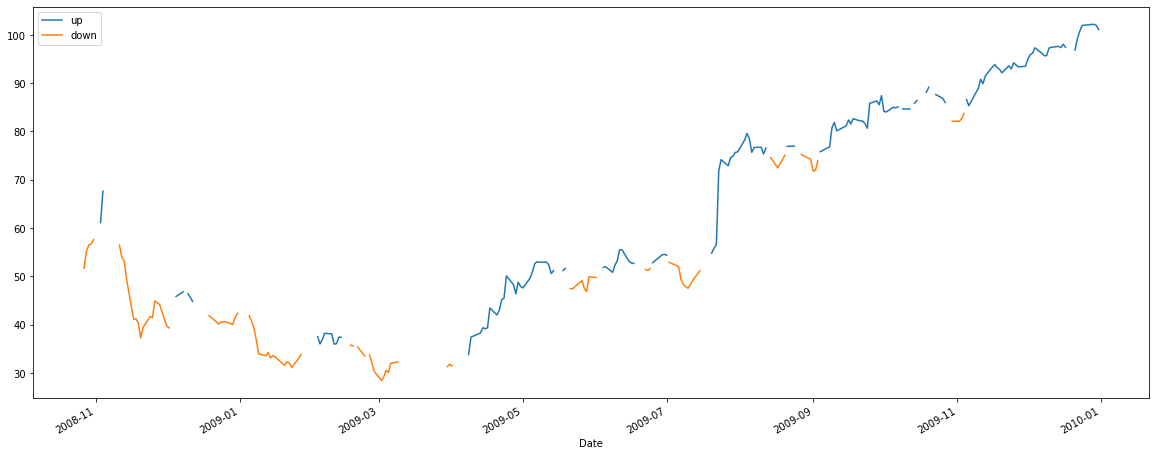

In [27]:
df['up'] = np.where(df['Trend']=='Up',df['Close'],None)
df['down'] = np.where(df['Trend']=='Down',df['Close'],None)
df[['up','down']][1000:].plot(figsize=(20,8))
df